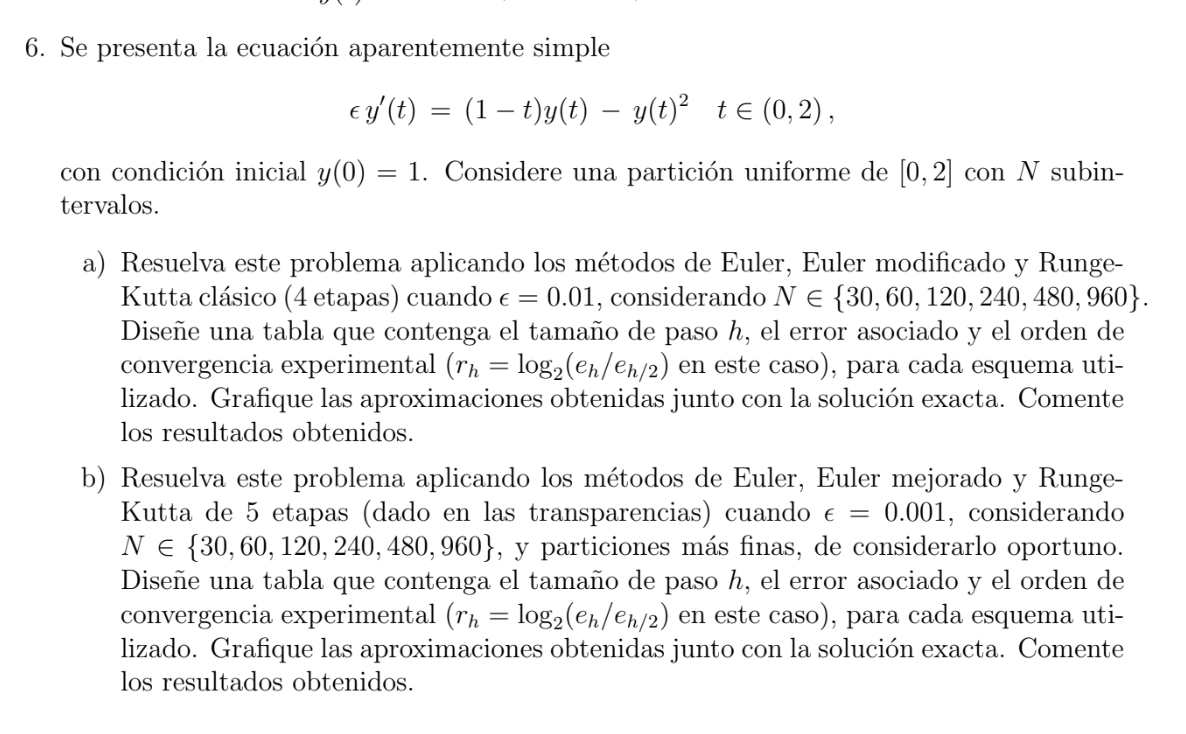

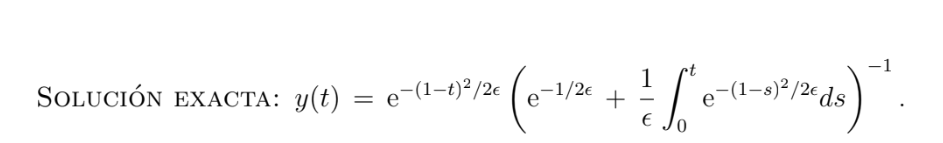

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad

## a) $\epsilon = 0.01$

In [23]:
epsilon = 0.01

In [24]:
def dy_dt(t, y):
    yt = ((1 - t) * y - y**2) / epsilon
    return yt

def analytical(t, **kwargs):
    # Define the integrand function
    def integrand(s):
        return np.exp(-((1 - s) ** 2) / (2 * epsilon))

    # Compute the integral from 0 to t
    integral, _ = quad(integrand, 0, t)

    # Compute the exponential terms
    exp_term1 = np.exp(-((1 - t) ** 2) / (2 * epsilon))
    exp_term2 = np.exp(-1 / (2 * epsilon))

    # Combine the terms to get y(t)
    y = exp_term1 * (exp_term2 + (1 / epsilon) * integral) ** (-1)

    return y

def approximate_with_method(method, h, t0, tf, y0):
    t_values = np.arange(t0, tf + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    for j in range(len(t_values) - 1):
        dy = dy_dt(t_values[j], y_values[j])
        y_values[j + 1] = method(yj=y_values[j], h=h, dy=dy, t=t_values[j], dy_dt=dy_dt)
    return t_values, y_values


def plot_approximation_results(method, method_name, h_values, t0, tf, y0, table):
    # Plot numerical solutions for each h
    h = 0.001  # High precision for analytical solution
    t_values_analytical, y_analytical = approximate_with_method(analytical, h, t0, tf, y0)

    for i, h in enumerate(h_values):
        t_values, y_aprox = approximate_with_method(method, h, t0, tf, y0)

        y_exact = y_analytical[-1]
        error = abs(y_aprox[-1] - y_exact)

        table["y_aprox"].append(y_aprox[-1])
        table["y_exact"].append(y_exact)
        table["error"].append(error)

        if i > 0:
            previous_error = table["error"][i - 1]
            rate = np.log2(previous_error / error)
            table["convergence_rate"].append(rate)

        plt.plot(
            t_values,
            y_aprox,
            label=f"h = {h}",
            marker="^",
            linestyle="",
            markersize="3",
        )
        plt.title(f"Approximation for step size {h} using {method_name}", fontsize="15")
        plt.xlabel("time (t)")
        plt.ylabel("y(t)")
        plt.grid()
        plt.show()

    plt.plot(t_values_analytical, y_analytical, label="analytical")
    plt.grid()
    plt.xlabel("time (t)")
    plt.ylabel("y(t)")
    plt.title("Analytical solution")
    plt.show()

    print(pd.DataFrame(table))


In [25]:
# given values, re used for all methods
number_of_subintervals = [30, 60, 120, 240, 480, 960]
# in this problem the h step is calculated based of the number of sub_intervals
t0 = 0
tf = 2
y0 = 1
h_values = [round((tf - t0) / n, 3) for n in number_of_subintervals]


def get_new_table():
    return {
        "N": number_of_subintervals,
        "h": h_values,
        "y_aprox": [],
        "y_exact": [],
        "error": [],
        "convergence_rate": [np.nan],
    }

/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


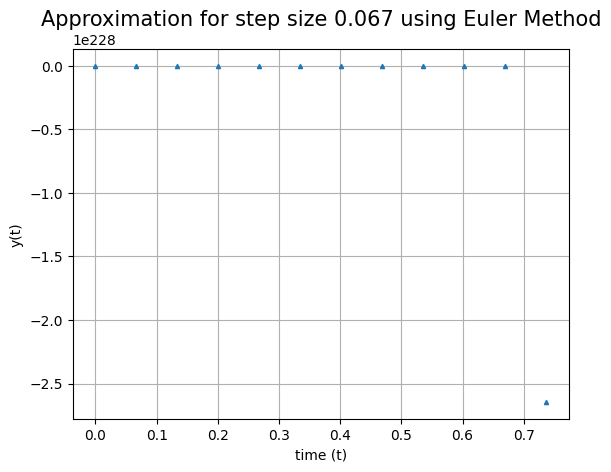

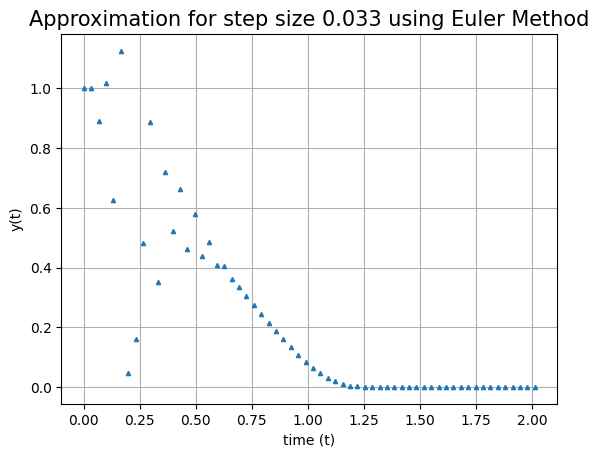

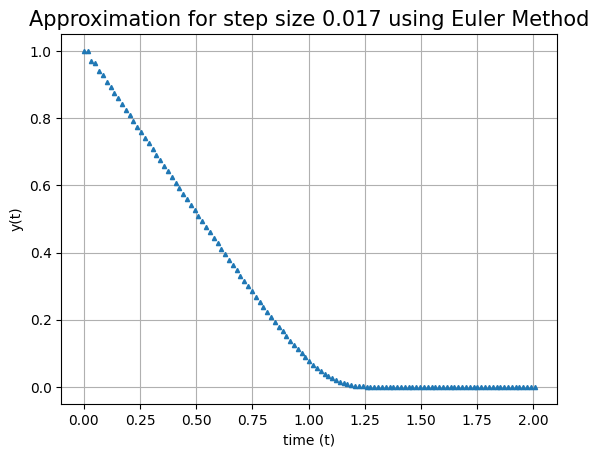

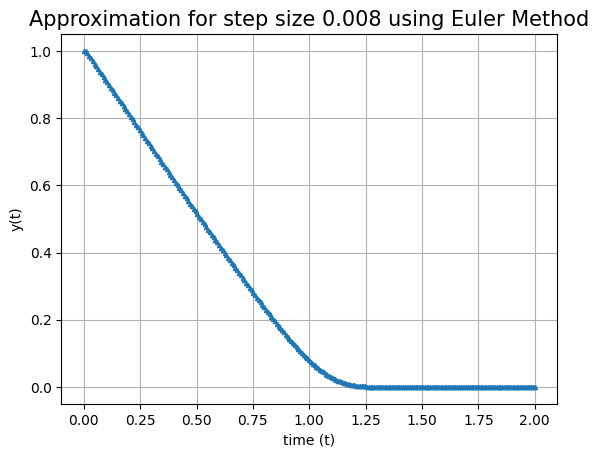

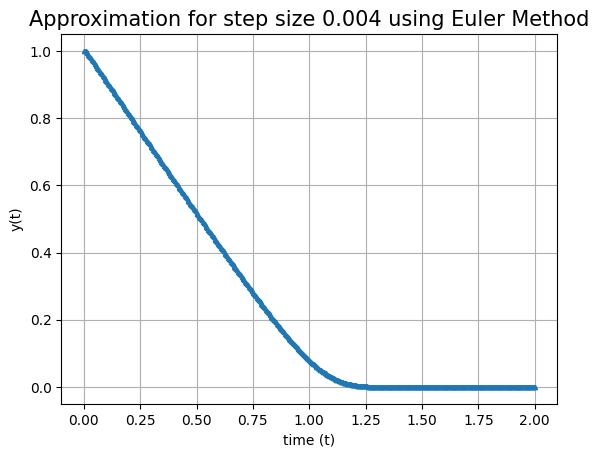

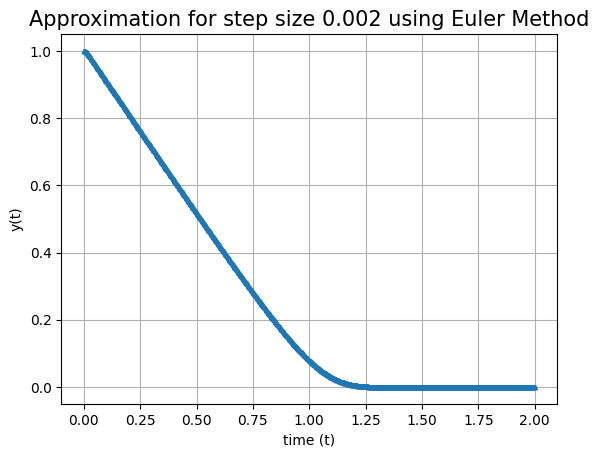

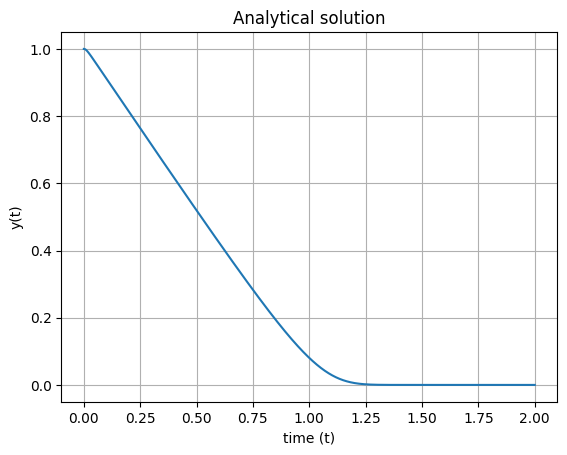

     N      h       y_aprox       y_exact         error  convergence_rate
0   30  0.067           NaN  8.503421e-24           NaN               NaN
1   60  0.033 -1.477934e-07  8.503421e-24  1.477934e-07               NaN
2  120  0.017  3.456275e-31  8.503421e-24  8.503421e-24      5.394832e+01
3  240  0.008  2.966447e-34  8.503421e-24  8.503421e-24     -5.858902e-08
4  480  0.004  2.066904e-27  8.503421e-24  8.501355e-24      3.507147e-04
5  960  0.002  2.061541e-25  8.503421e-24  8.297267e-24      3.505646e-02


In [26]:
def euler(yj, h, dy, **kwargs):
    return yj + h * dy


plot_approximation_results(
    method=euler,
    method_name="Euler Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table()
)


/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


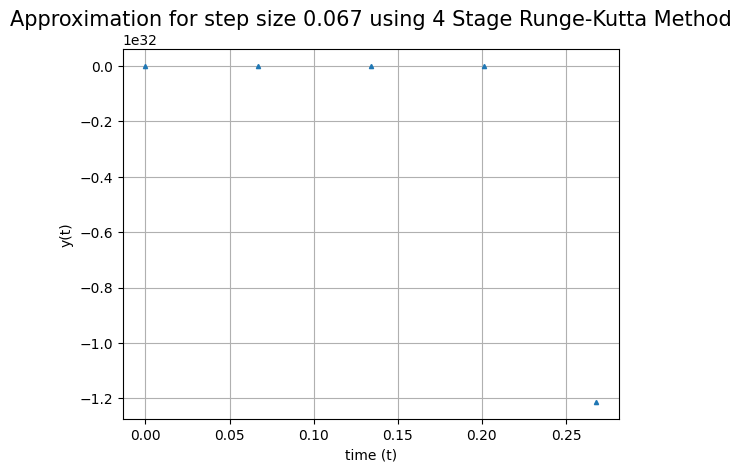

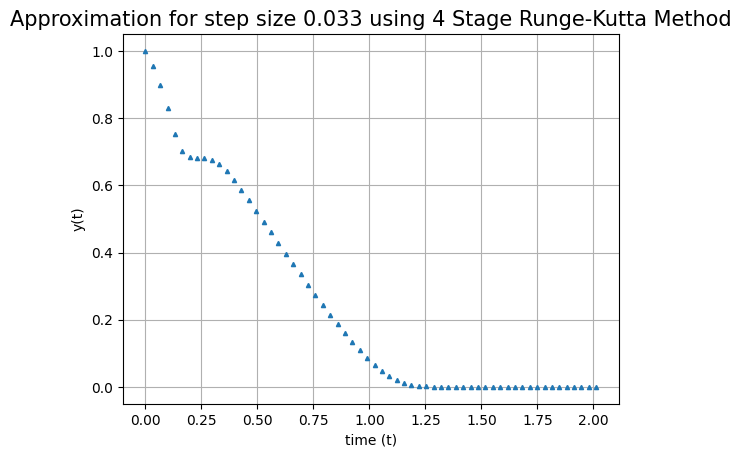

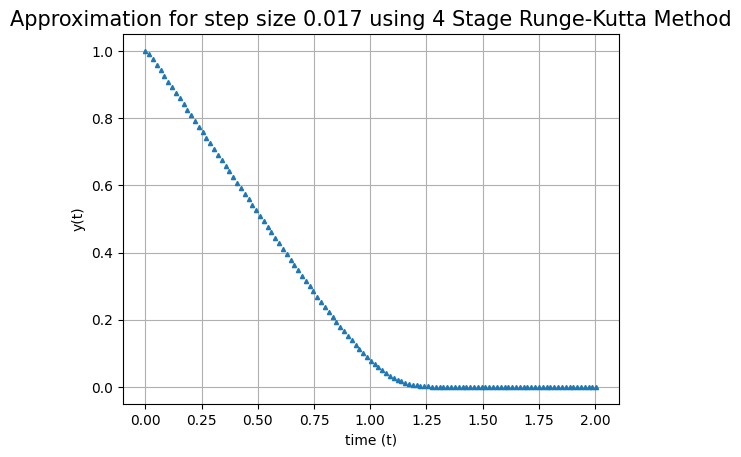

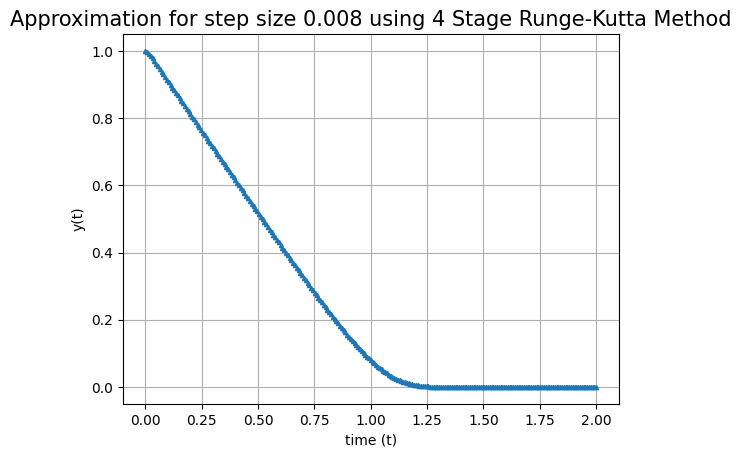

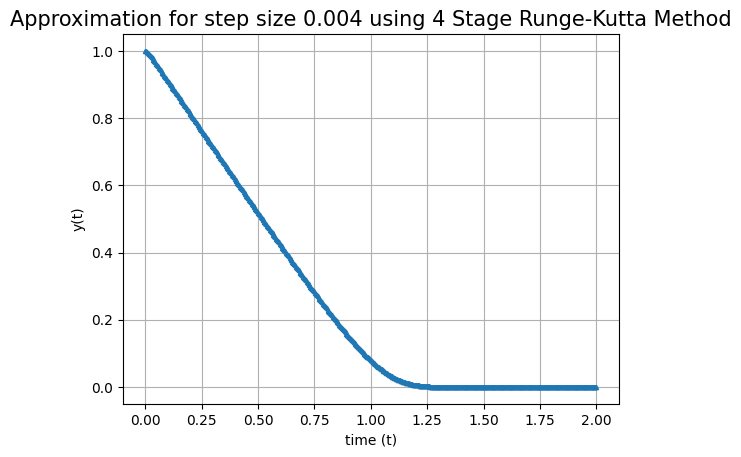

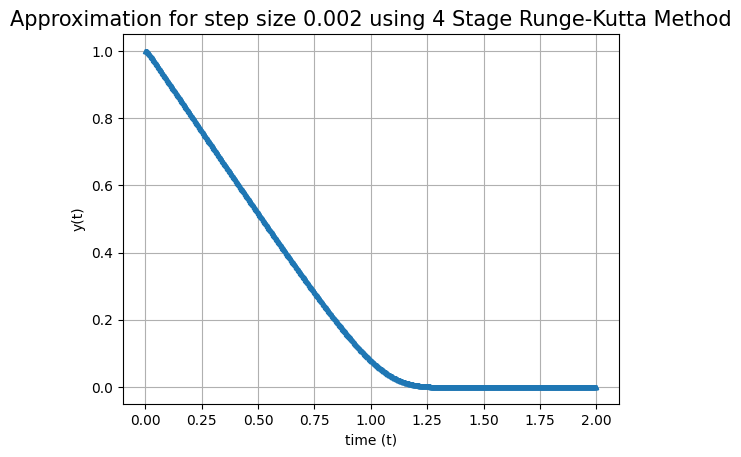

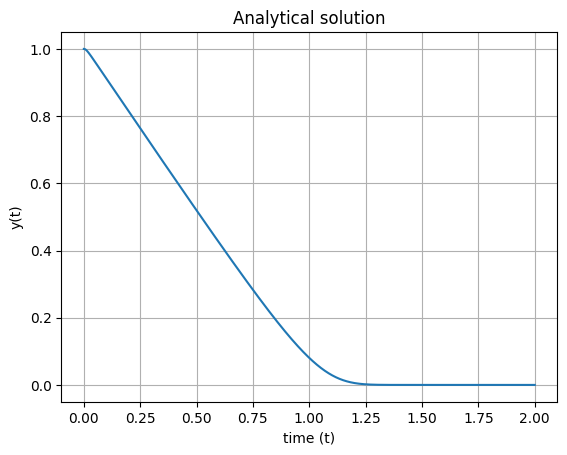

     N      h       y_aprox       y_exact         error  convergence_rate
0   30  0.067           NaN  8.503421e-24           NaN               NaN
1   60  0.033  7.529260e-10  8.503421e-24  7.529260e-10               NaN
2  120  0.017  1.785539e-22  8.503421e-24  1.700505e-22         42.009682
3  240  0.008  8.515513e-24  8.503421e-24  1.209128e-26         13.779709
4  480  0.004  7.731161e-24  8.503421e-24  7.722601e-25         -5.997048
5  960  0.002  7.696572e-24  8.503421e-24  8.068491e-25         -0.063212


In [27]:
def runge_kutta_4_stage(yj, t, h, dy_dt, **kwargs):
    # Stage 1
    k1 = dy_dt(t, yj)

    # Stage 2
    k2 = dy_dt(t + h / 2, yj + h / 2 * k1)

    # Stage 3
    k3 = dy_dt(t + h / 2, yj + h / 2 * k2)

    # Stage 4
    k4 = dy_dt(t + h, yj + h * k3)

    # Combine stages to compute yj_{n+1}
    phi = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    y_next = yj + h * phi

    return y_next


plot_approximation_results(
    method=runge_kutta_4_stage,
    method_name="4 Stage Runge-Kutta Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)


/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


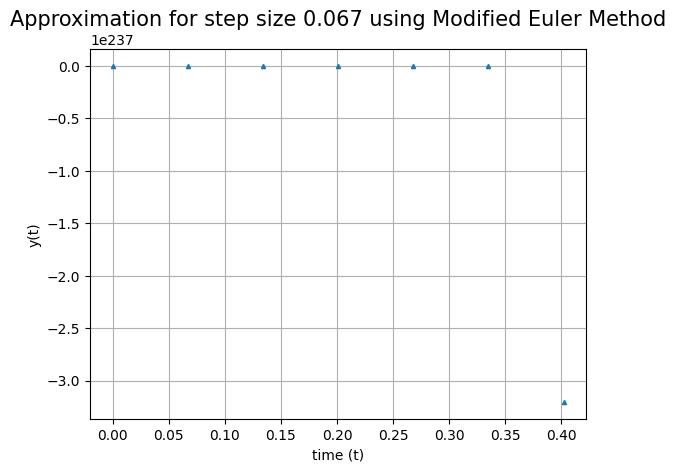

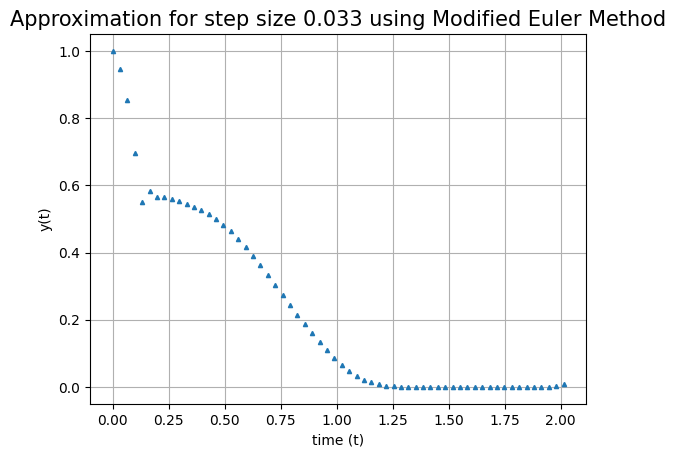

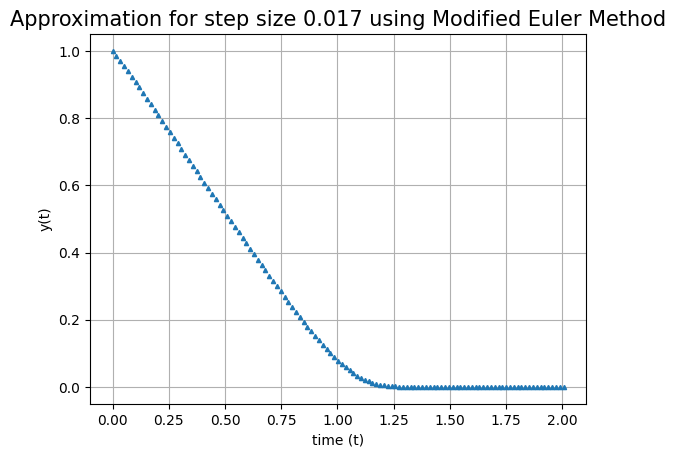

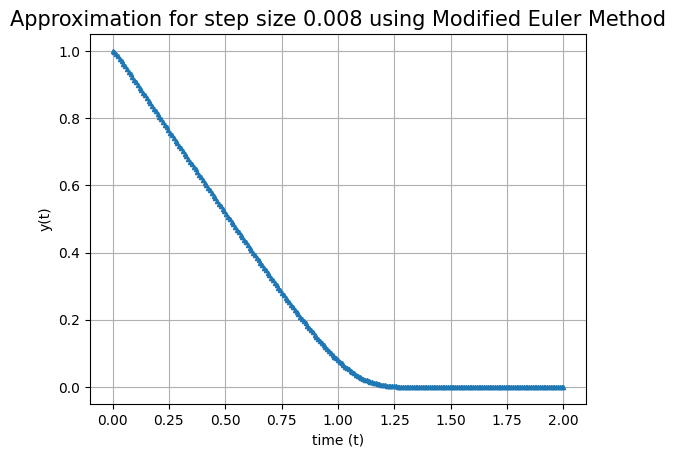

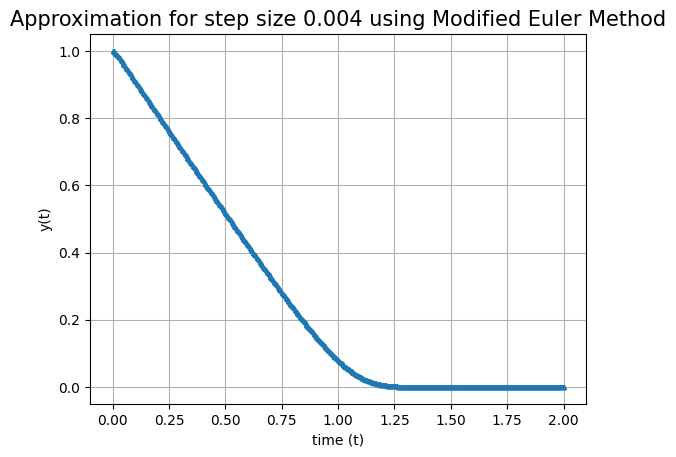

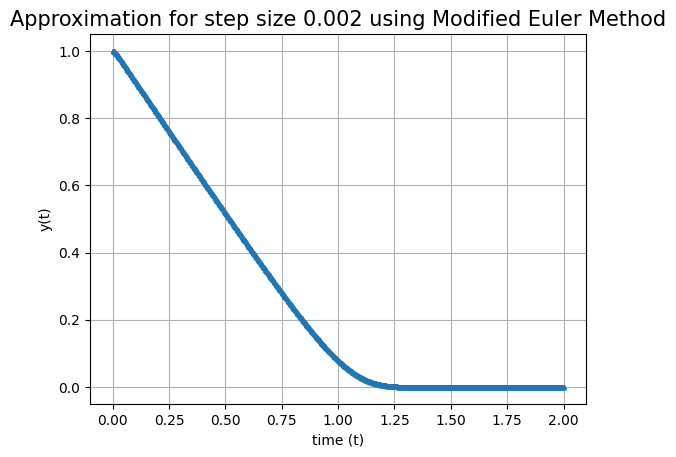

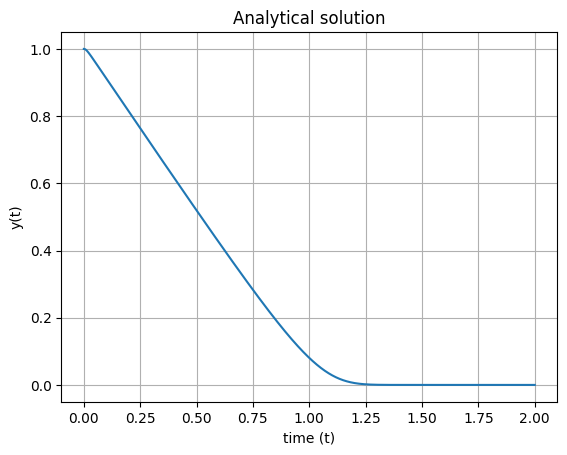

     N      h       y_aprox       y_exact         error  convergence_rate
0   30  0.067           NaN  8.503421e-24           NaN               NaN
1   60  0.033  9.664368e-03  8.503421e-24  9.664368e-03               NaN
2  120  0.017  1.144109e-14  8.503421e-24  1.144109e-14         39.619660
3  240  0.008  4.455731e-22  8.503421e-24  4.370696e-22         24.641786
4  480  0.004  1.749724e-23  8.503421e-24  8.993820e-24          5.602785
5  960  0.002  9.234916e-24  8.503421e-24  7.314949e-25          3.620014


In [28]:
def modified_euler(yj, h, dy, t, dy_dt):
    # Calculate the midpoint values
    t_mid = t + h / 2
    y_mid = yj + (h / 2) * dy
    # Use the slope at the midpoint to compute the next value
    return yj + h * dy_dt(t_mid, y_mid)


plot_approximation_results(
    method=modified_euler,
    method_name="Modified Euler Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)


## Some comments

It is clear that for small values of N, the methods do not yield good results, given that this is a stiff problem. After 4 Step Runge Kutta starts producing good results already for $h = 0.033$, while the naive Euler method needs a step size of $h=0.017$ to produce similarly good results, the modified Euler method suffers from the same problem, being also an explicit method

## b) $\epsilon = 0.001$

In [29]:
epsilon = 0.001

/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar divide
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


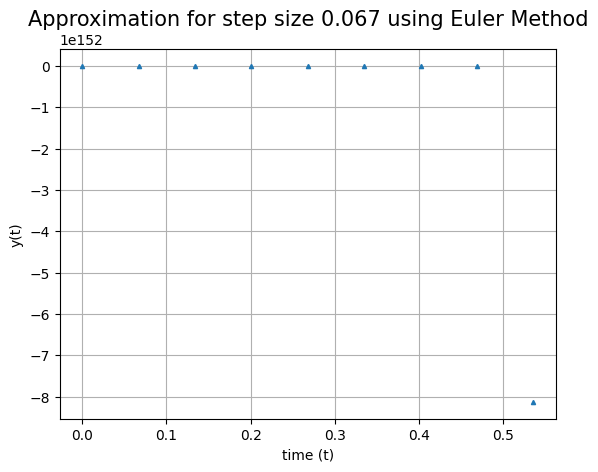

/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon


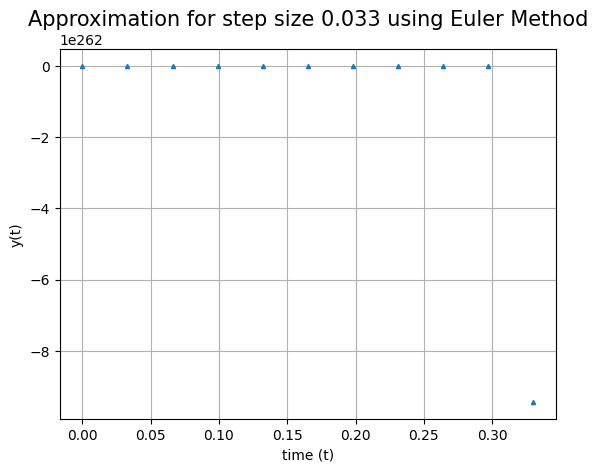

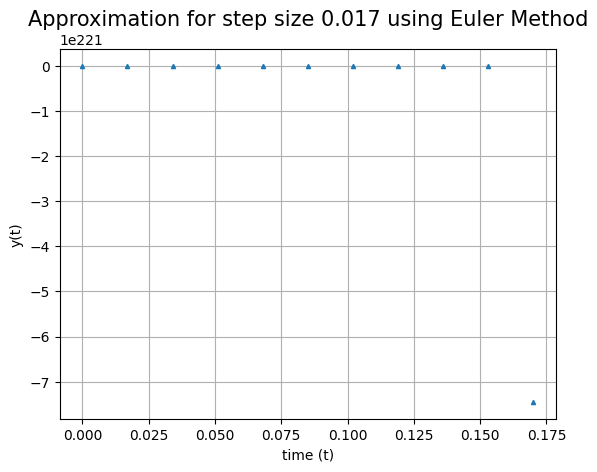

/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  yt = ((1 - t) * y - y**2) / epsilon


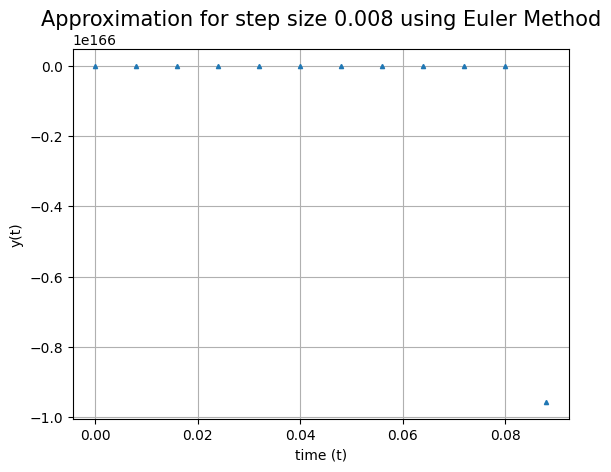

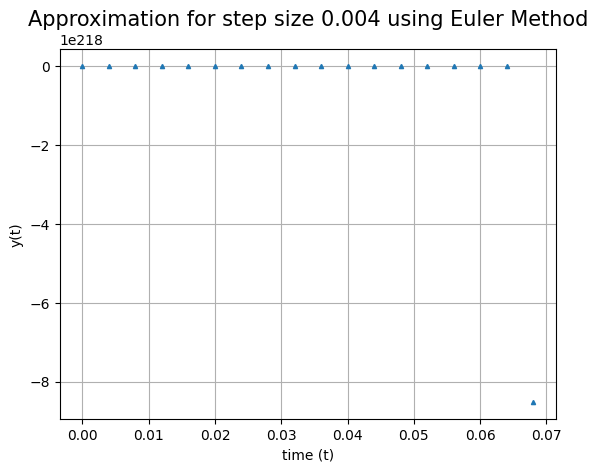

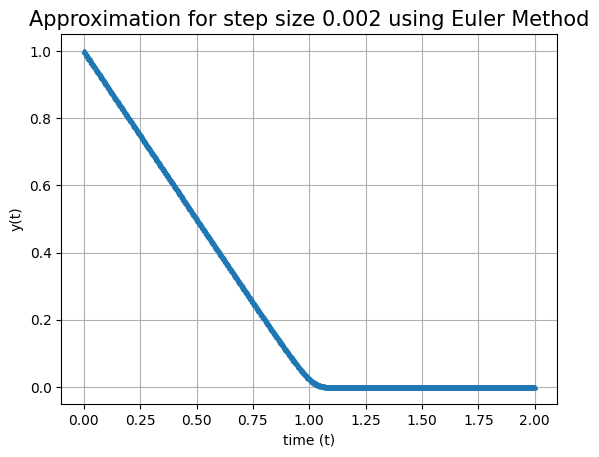

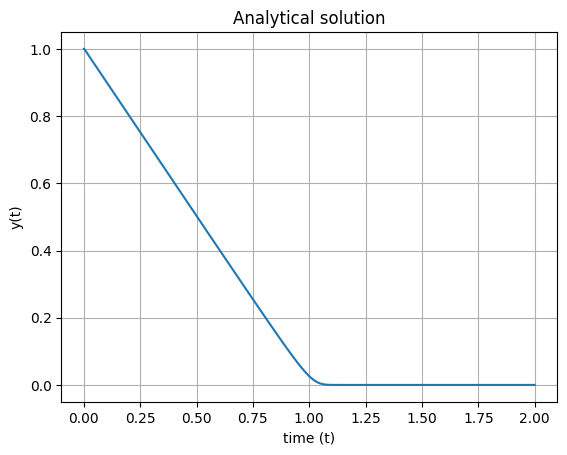

     N      h  y_aprox        y_exact          error  convergence_rate
0   30  0.067      NaN  2.442004e-219            NaN               NaN
1   60  0.033      NaN  2.442004e-219            NaN               NaN
2  120  0.017      NaN  2.442004e-219            NaN               NaN
3  240  0.008      NaN  2.442004e-219            NaN               NaN
4  480  0.004      NaN  2.442004e-219            NaN               NaN
5  960  0.002      0.0  2.442004e-219  2.442004e-219               NaN


In [31]:
def euler(yj, h, dy, **kwargs):
    return yj + h * dy


plot_approximation_results(
    method=euler,
    method_name="Euler Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)


/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


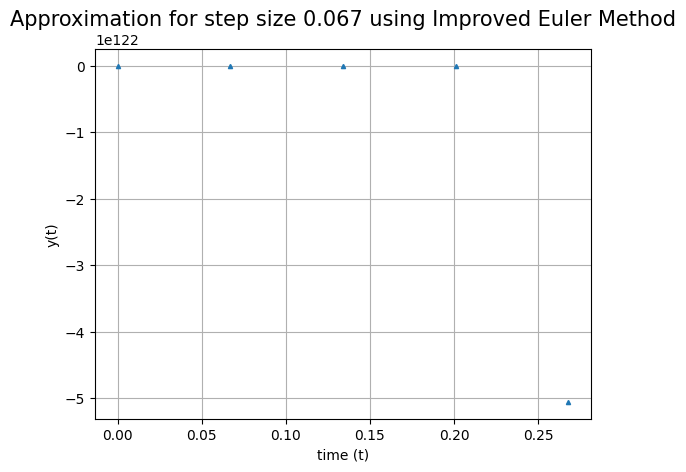

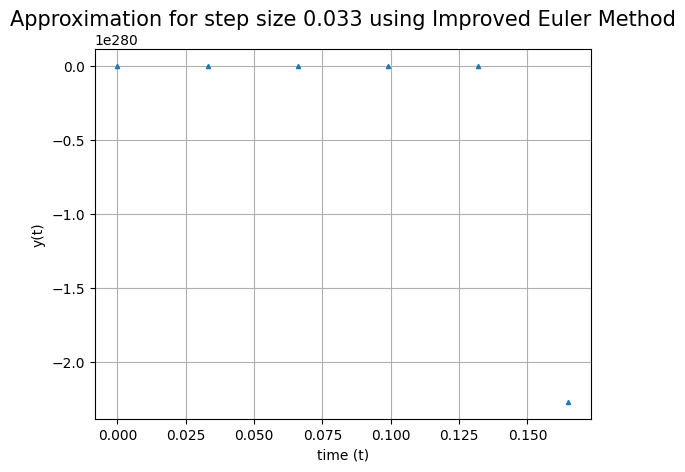

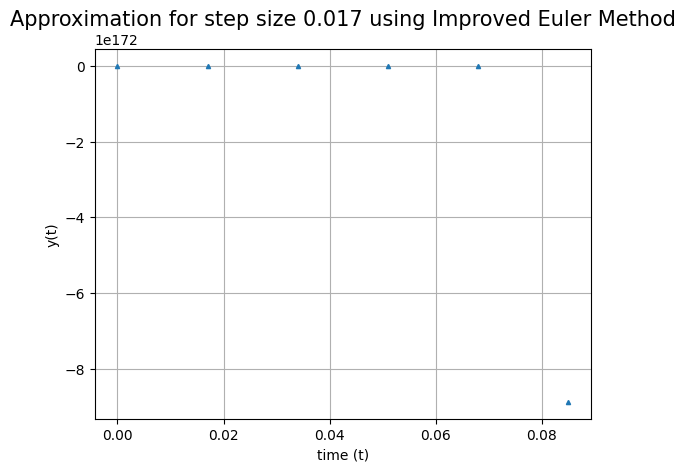

/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  yt = ((1 - t) * y - y**2) / epsilon


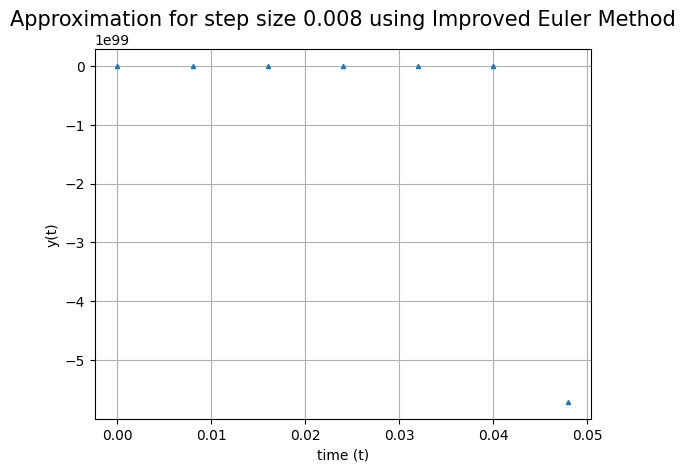

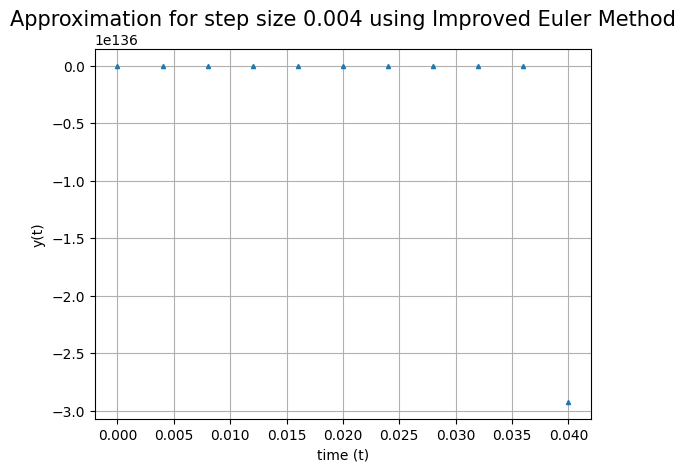

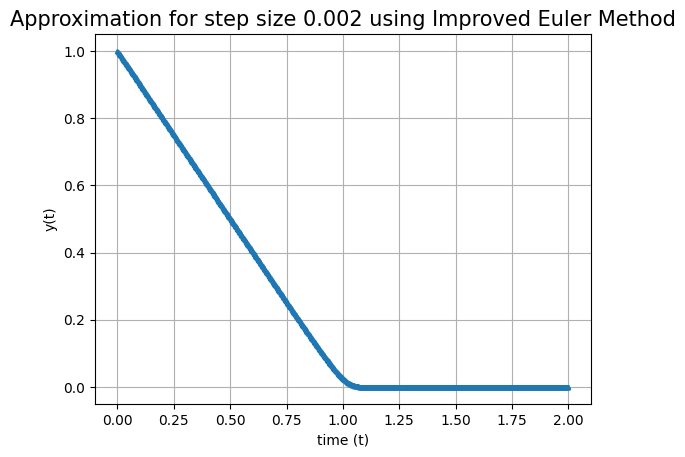

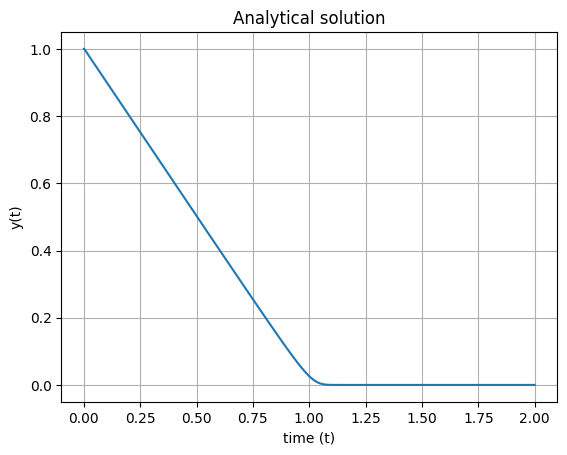

     N      h       y_aprox        y_exact         error  convergence_rate
0   30  0.067           NaN  2.442004e-219           NaN               NaN
1   60  0.033           NaN  2.442004e-219           NaN               NaN
2  120  0.017           NaN  2.442004e-219           NaN               NaN
3  240  0.008           NaN  2.442004e-219           NaN               NaN
4  480  0.004           NaN  2.442004e-219           NaN               NaN
5  960  0.002  7.951098e-96  2.442004e-219  7.951098e-96               NaN


In [32]:
def improved_euler(yj, h, dy, t, dy_dt):
    # Predictor step (euler)
    predictor = euler(yj, h, dy)
    # Corrector step: y_next = yn + (h / 2) * [f(tn, yn) + f(tn+1, y_predict)]
    corrected = yj + (h / 2) * (dy + dy_dt(t + h, predictor))
    return corrected

plot_approximation_results(
    method=improved_euler,
    method_name="Improved Euler Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)


/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: overflow encountered in scalar power
  yt = ((1 - t) * y - y**2) / epsilon
/tmp/ipykernel_5538/847446874.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  yt = ((1 - t) * y - y**2) / epsilon


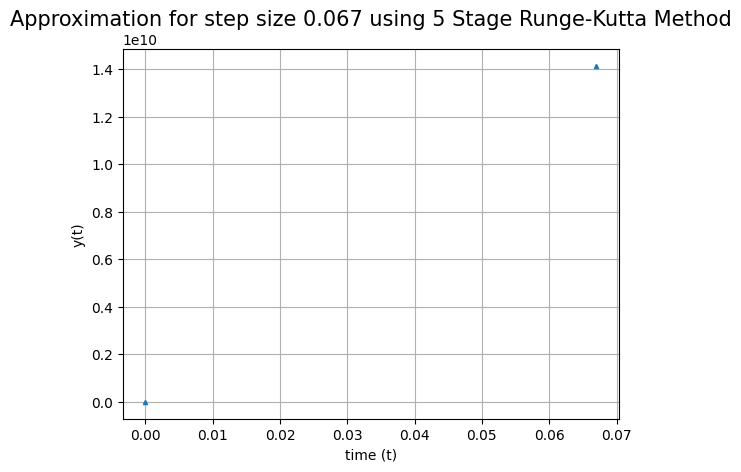

/tmp/ipykernel_5538/1133000816.py:35: RuntimeWarning: invalid value encountered in scalar add
  k4 = dy_dt(t + h * a4, yj + h * (b41 * k1 + b42 * k2 + b43 * k3),)
/tmp/ipykernel_5538/1133000816.py:39: RuntimeWarning: invalid value encountered in scalar add
  t + h * a5, yj + h * (b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4)
/tmp/ipykernel_5538/1133000816.py:43: RuntimeWarning: invalid value encountered in scalar multiply
  phi = c1 * k1 + c2 * k2 + c3 * k3 + c4 * k4 + c5 * k5


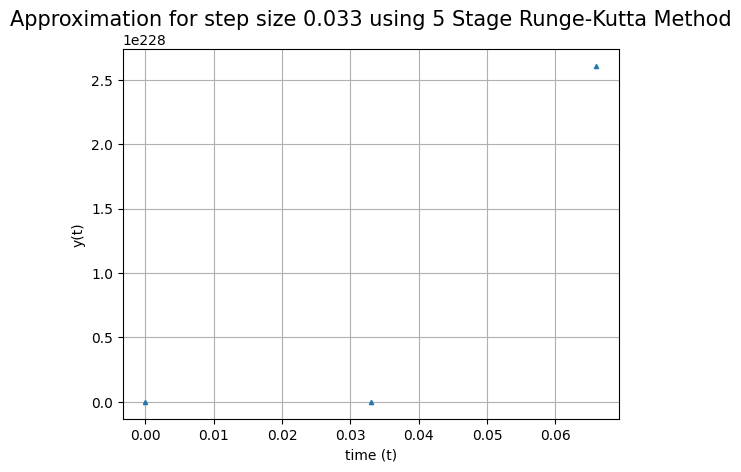

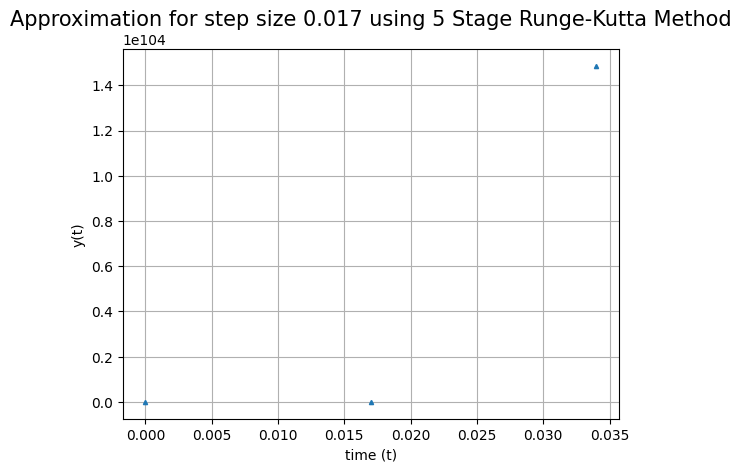

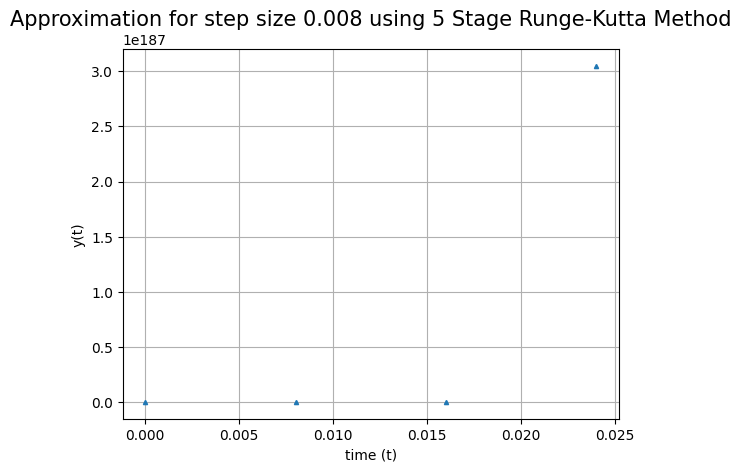

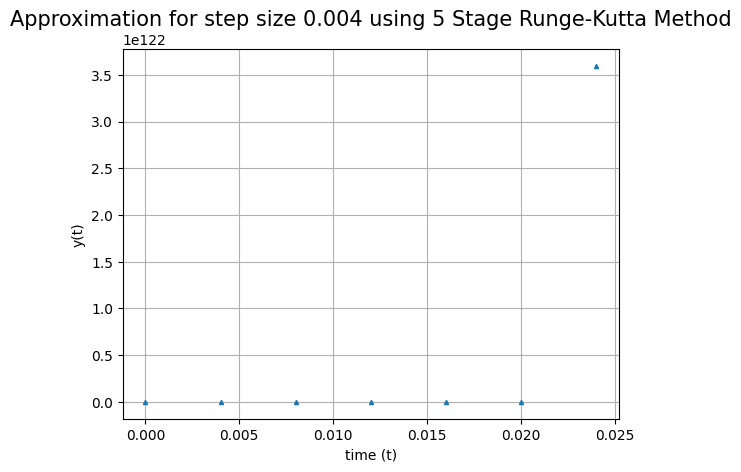

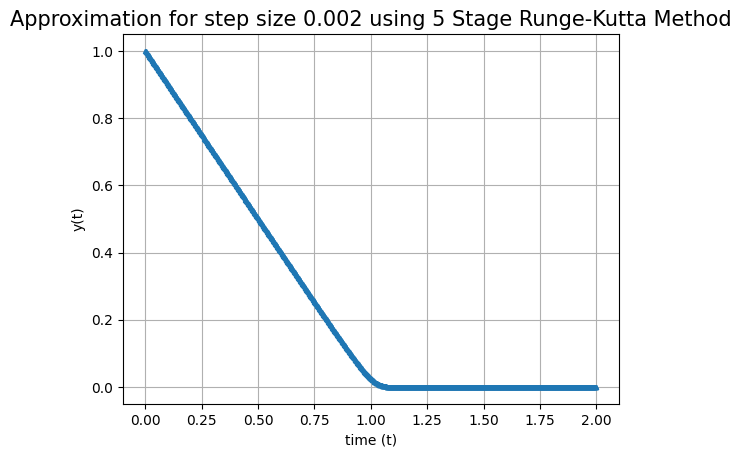

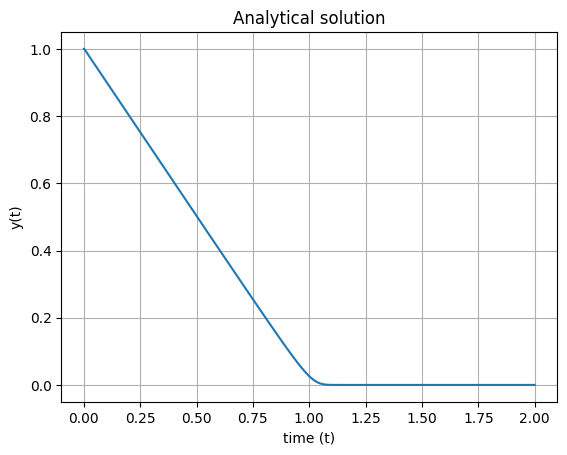

     N      h        y_aprox        y_exact          error  convergence_rate
0   30  0.067            NaN  2.442004e-219            NaN               NaN
1   60  0.033            NaN  2.442004e-219            NaN               NaN
2  120  0.017            NaN  2.442004e-219            NaN               NaN
3  240  0.008            NaN  2.442004e-219            NaN               NaN
4  480  0.004            NaN  2.442004e-219            NaN               NaN
5  960  0.002  4.466022e-249  2.442004e-219  2.442004e-219               NaN


In [34]:
def runge_kutta_5_stage(yj, t, h, dy_dt, **kwargs):
    # Coefficients
    a2 = 1 / 4
    a3 = 3 / 8
    a4 = 12 / 13
    a5 = 1

    b21 = 1 / 4
    b31 = 3 / 32
    b32 = 9 / 32
    b41 = 1932 / 2197
    b42 = -7200 / 2197
    b43 = 7296 / 2197
    b51 = 439 / 216
    b52 = -8
    b53 = 3680 / 513
    b54 = -845 / 4104

    c1 = 25 / 216
    c2 = 0
    c3 = 1408 / 2565
    c4 = 2197 / 4104
    c5 = -1 / 5

    # Stage 1
    k1 = dy_dt(t, yj)

    # Stage 2
    k2 = dy_dt(t + h * a2, yj + h * (b21 * k1),)

    # Stage 3
    k3 = dy_dt(t + h * a3, yj + h * (b31 * k1 + b32 * k2),)

    # Stage 4
    k4 = dy_dt(t + h * a4, yj + h * (b41 * k1 + b42 * k2 + b43 * k3),)

    # Stage 5
    k5 = dy_dt(
        t + h * a5, yj + h * (b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4)
    )

    # Combine stages to compute yj_{n+1}
    phi = c1 * k1 + c2 * k2 + c3 * k3 + c4 * k4 + c5 * k5
    y_next = yj + h * phi

    return y_next

plot_approximation_results(
    method=runge_kutta_5_stage,
    method_name="5 Stage Runge-Kutta Method",
    h_values=h_values,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)

## Some comments

For this $\epsilon$ we see how the stiffness of the ODE being considered makes it necesary to have a very small $h$ for the method to yield any good results, even being unable to get any results for $ h > 0.002$, with the `y_aprox` value going to infinity.
